# Chapter 2
## Sobolev Spaces


In [1]:
## Imports
import numpy   as np
import scipy   as sp
import dolfinx as dfx
import matplotlib.pyplot as plt


import ufl

from ufl      import grad, inner, dx
from mpi4py   import MPI
from petsc4py import PETSc

%matplotlib widget

## Exercise 2.1

Compute the $H^1$ and $L^2$ norms of a random function with values in (0, 1) on meshes representing the unit interval of with 10, 100, and 1000 cells.

Number of cells: 10
L2 norm: 5.68e-01
H1 norm: 4.54e+00


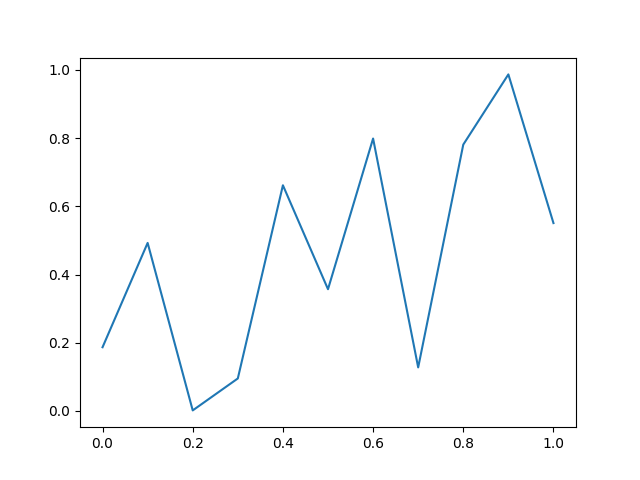

Number of cells: 100
L2 norm: 5.87e-01
H1 norm: 4.42e+01


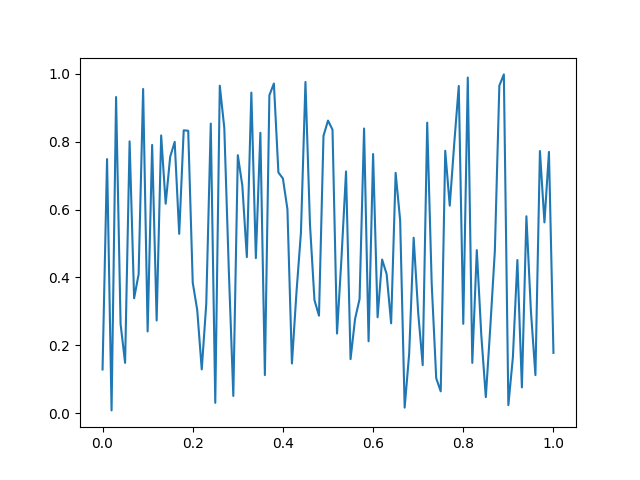

Number of cells: 1000
L2 norm: 5.78e-01
H1 norm: 4.15e+02


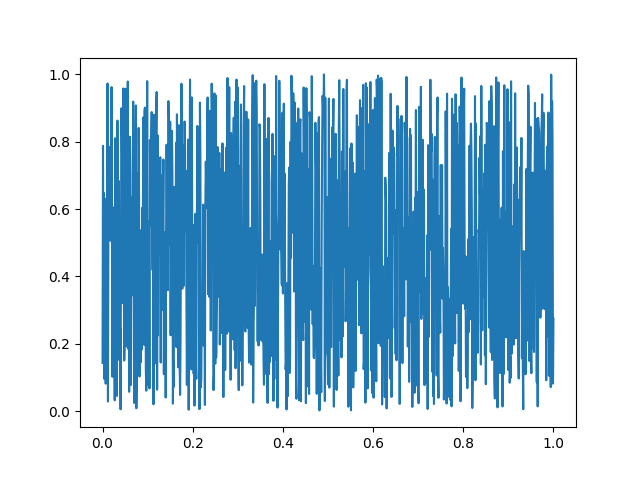

In [24]:
plt.clf()
#i = 0
for N_cells in [10, 100, 1000]:
    print(f"Number of cells: {N_cells}")
    x  = np.linspace(0, 1, N_cells + 1)
    rng = np.random.default_rng()
    f = rng.random(N_cells + 1)
    norm_L2 = np.sqrt(np.trapz(f**2,  x))
    #norm_H1 = np.sqrt(np.trapz(f**2 + df**2, x))
    print(f"L2 norm: {norm_L2:.2e}")
    
    
    mesh = dfx.mesh.create_unit_interval(MPI.COMM_WORLD, N_cells)
    P1   = ufl.FiniteElement("CG", mesh.ufl_cell(), 1)
    V = dfx.fem.FunctionSpace(mesh, P1)
    v = dfx.fem.Function(V)
    v.x.array[:] = f

    a = inner(grad(v), grad(v)) * dx
    norm = dfx.fem.assemble_scalar(dfx.fem.form(a))
    norm = np.sqrt(norm)
    print(f"H1 norm: {norm:.2e}")
    
    plt.figure(i)
    plt.plot(x, f)
    plt.show()
    i += 1
    
    

In [20]:
mesh = dfx.mesh.create_unit_interval(MPI.COMM_WORLD, N_cells)
P1   = ufl.FiniteElement("CG", mesh.ufl_cell(), 1)
V = dfx.fem.FunctionSpace(mesh, P1)
v = dfx.fem.Function(V)
v.x.array[:] = f

a = inner(grad(v), grad(v)) * dx
norm = dfx.fem.assemble_scalar(dfx.fem.form(a))
norm = np.sqrt(norm)
print(norm)

389.5674006419384


## Exercise 2.2

Compute the $H^1$ and $L^2$ norms of $\sin{(k\pi x)}$ on the unit interval analytically, and compare with the values presented in Table 2.2 (of the lecture notes).

In [29]:
L2 = np.sqrt(1/2)
H1 = lambda x: np.sqrt((1 + x**2*np.pi**2)/2)
print(L2)
print(H1(1))
print(H1(10))
print(H1(100))

0.7071067811865476
2.331266222580484
22.225665795527203
222.14527230046284


## Exercise 2.3

Compute the $H^1$ and $L^2$ norms of the hat function defined on $x \in [0, 1]$:

$$ f(x) = \left\{ 
  \begin{array}{ c l }
    10(x - 0.2) & \quad \textrm{if } 0.2 \leq x \leq 0.3, \\ 
    10(0.4 - x) & \quad \textrm{if } 0.3 < x \leq 0.4, \\
    0                 & \quad \textrm{otherwise}.
  \end{array}
\right.$$

Since the derivative of $f(x)$ is 

$$ f'(x) = \left\{ 
  \begin{array}{ c l }
    10 & \quad \textrm{if } 0.2 < x < 0.3, \\ 
    -10 & \quad \textrm{if } 0.3 < x < 0.4, \\
    0                 & \quad \textrm{otherwise},
  \end{array}
\right.$$
that is, a piecewise constant function, the $H^1$ norm by
$$\vert\vert f(x)\vert\vert_{H^1}^2 = \int_{\Omega}\left(f'(x)\right)^2 dx$$
is simply computed by calculating the area of two rectangles:
$$10^2 \cdot 0.1 + (-10)^2 \cdot 0.1 = 20,$$
and then taking the square root to obtain
$$\vert\vert f(x)\vert\vert_{H^1} = \sqrt{20}.$$

In [7]:
f1_sq = lambda x: (10 * (x - 0.2)) ** 2
f2_sq = lambda x: (10 * (0.4 - x)) ** 2

norm_L2 = np.sqrt(sp.integrate.quad(f1_sq, 0.2, 0.3)[0] + sp.integrate.quad(f2_sq, 0.3, 0.4)[0])
print(f"L2 norm: {norm_L2:.2e}")

L2 norm: 2.58e-01


## Exercise 2.4

Compute the $H^1$ and $L^2$ norms of the hat function $u$ defined on $x \in [0, 1]$ in the following way:

$$ u(x) = \left\{ 
  \begin{array}{ c l }
    \frac{1}{h}\left(x - 0.5 + h\right) & \quad \textrm{if } 0.5 - h \leq x \leq 0.5, \\ 
    \frac{1}{h}\left(0.5 - h - x\right) & \quad \textrm{if } 0.5 < x \leq 0.5 + h, \\
    0                 & \quad \textrm{otherwise},
  \end{array}
\right.$$
analytically. Also, calculate the $L^2$, $H^1$ and $H^{-1}$ norms numerically for the values $h = 1/10, 1/100, 1/1000$.

In [12]:
def u1_sq(x, h):
    return (1/h * (x - 0.5 + h)) ** 2

def u2_sq(x, h):
    return (1/h * (0.5 - h - x)) ** 2

for h in [1/10, 1/100, 1/1000]:
    print(f"h = {h}")
    norm_L2 = np.sqrt(sp.integrate.quad(lambda x: u1_sq(x, h), 0.5 - h, 0.5)[0] +
                      sp.integrate.quad(lambda x: u2_sq(x, h), 0.5, 0.5 + h)[0])
    norm_H1 = np.sqrt(2/h)
    print(f"L2 norm: {norm_L2:.2e}")
    print(f"H1 norm: {norm_H1:.2e}\n")


h = 0.1
L2 norm: 5.16e-01
H1 norm: 4.47e+00

h = 0.01
L2 norm: 1.63e-01
H1 norm: 1.41e+01

h = 0.001
L2 norm: 5.16e-02
H1 norm: 4.47e+01



array([0.1 , 0.01])